In [16]:
from kafka import KafkaConsumer

In [17]:
import numpy as np
import pickle
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from json import dumps


from sklearn.metrics import classification_report,accuracy_score



In [18]:
consumer = KafkaConsumer(
    'ml-raw-dns',
    bootstrap_servers="localhost:9092",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)

In [19]:
max_messages = 1000  # Set your desired maximum number of messages
message_count = 0
 #this function gets the records of th
def get_records (max_messages):
    records =[]
    message_count = 0
    for m in consumer:
      #  print(m.value)
        records.append(m.value)
        message_count += 1
        if message_count >= max_messages:
            break
    return records


 

In [20]:
# a= get_records(1000)

In [21]:
col_names =["timestamp","FQDN_count","subdomain_length","upper","lower","numeric","entropy","special","labels","labels_max","labels_average","longest_word","sld","len","subdomain","Target Attack"]
def Read_data( data):
    dataframe=pd.DataFrame()
    list_of_rows=[]
    for item in data:
        row_string=eval(item.decode("UTF-8"))
        row_string = row_string.strip()
        row= row_string.split(",")
        list_of_rows.append(row)
    dataframe=pd.DataFrame(list_of_rows)
    dataframe.columns=col_names
    return dataframe

In [22]:
def data_preprocessing(data):
    data = data.drop_duplicates()
    data = data.dropna()
    data = data.drop(columns=['timestamp'])
    categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
    for coolumn in categorical_cols :
        label_encoder = LabelEncoder()
        # Fit the encoder on the existing data
        label_encoder.fit(data[coolumn])
        # Transform new data to numeric values
        data[coolumn] = label_encoder.transform(data[coolumn])
        #print("Encoded values for new data:", data)
    return data 

In [23]:
def pipe_line(data):

    pipe = Pipeline(steps=[("MI with RF",SelectKBest(score_func=mutual_info_classif, k=8)), ("RandomForestClassifier", RandomForestClassifier())])
    X =data.drop(labels = ["Target Attack"], axis=1)
    y=data["Target Attack"]
    pipe.fit(X,y)
    return pipe

In [24]:
static_model =pickle.load(open('static_model_tuned.pkl', 'rb'))

In [25]:
Dynamic_model= pickle.load(open('static_model_tuned.pkl', 'rb'))

In [26]:
selectted_columns = ['sld', 'longest_word', 'numeric', 'subdomain_length', 'FQDN_count',
       'special', 'upper', 'labels' , 'Target Attack']

In [27]:
def Feature_select(data):
    data = data [selectted_columns]
    return data


In [28]:
# def retrain(data):

#     pipe = Pipeline(steps=[("MI with RF",SelectKBest(score_func=mutual_info_classif, k=8)), ("RandomForestClassifier", RandomForestClassifier())])
#     X =data.drop(labels = ["Target Attack"], axis=1)
#     y=data["Target Attack"]
#     pipe.fit(X,y)
#     return pipe

In [29]:
# data.head

The F1 Score of Dynamic Model without retrain = 80.18018018018019%
The F1 Score of Dynamic Model without retrain = 80.48048048048048%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.98098098098097%
The F1 of Static Model = 80.48048048048048%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 78.714859437751%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.01606425702812%
The F1 of Static Model = 78.21285140562249%
**********
The F1 Score of Dynamic Model without retrain = 65.16516516516516%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 77.37737737737737%
The F1 of Static Model = 80.88088088088088%
**********
The F1 Score of Dynamic Model without retrain = 79.61847389558233%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 79.61847389558233%
The F1 of Static Model = 79.11646586345381%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.6841046277666%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.58350100603622%
The F1 of Static Model = 79.87927565392354%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 80.52208835341365%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.72289156626506%
The F1 of Static Model = 79.41767068273093%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.58058058058059%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.48048048048048%
The F1 of Static Model = 79.97997997997997%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 64.09227683049149%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.34403209628887%
The F1 of Static Model = 80.84252758274825%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.88188188188188%
Retraining model on new data
The F1 of Dynamic Model after retrain = 82.38238238238237%
The F1 of Static Model = 81.48148148148148%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 82.04613841524574%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.54463390170511%
The F1 of Static Model = 81.04312938816449%
**********
The F1 Score of Dynamic Model without retrain = 81.56312625250501%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 81.86372745490982%
The F1 of Static Model = 81.4629258517034%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.58058058058059%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.58058058058059%
The F1 of Static Model = 79.57957957957959%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 80.18018018018019%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.48048048048048%
The F1 of Static Model = 79.97997997997997%
**********
The F1 Score of Dynamic Model without retrain = 81.04312938816449%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 81.64493480441324%
The F1 of Static Model = 81.34403209628887%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.68168168168168%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.48148148148148%
The F1 of Static Model = 80.98098098098097%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.67967967967968%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.47947947947948%
The F1 of Static Model = 78.97897897897897%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 78.5%
Retraining model on new data
The F1 of Dynamic Model after retrain = 78.9%
The F1 of Static Model = 78.5%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 83.16633266533067%
Retraining model on new data
The F1 of Dynamic Model after retrain = 82.46492985971943%
The F1 of Static Model = 82.56513026052104%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 82.04613841524574%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.14343029087262%
The F1 of Static Model = 81.64493480441324%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.10000000000001%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.60000000000001%
The F1 of Static Model = 79.7%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.58058058058059%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.68168168168168%
The F1 of Static Model = 81.68168168168168%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 80.18018018018019%
Retraining model on new data
The F1 of Dynamic Model after retrain = 77.77777777777779%
The F1 of Static Model = 79.47947947947948%
**********

C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)



The F1 Score of Dynamic Model without retrain = 80.44132397191575%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.34102306920762%
The F1 of Static Model = 79.73921765295887%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.02409638554217%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.02008032128514%
The F1 of Static Model = 80.92369477911646%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 78.47847847847848%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.77977977977979%
The F1 of Static Model = 81.38138138138137%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.48048048048048%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.88088088088088%
The F1 of Static Model = 79.97997997997997%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.2%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.2%
The F1 of Static Model = 80.60000000000001%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 82.08208208208208%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.38138138138137%
The F1 of Static Model = 80.88088088088088%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.38038038038037%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.58058058058059%
The F1 of Static Model = 80.08008008008008%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.53861584754263%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.73921765295887%
The F1 of Static Model = 78.93681043129388%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 78.7%
Retraining model on new data
The F1 of Dynamic Model after retrain = 78.60000000000001%
The F1 of Static Model = 78.3%
**********
The F1 Score of Dynamic Model without retrain = 81.64493480441324%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 82.14643931795386%
The F1 of Static Model = 82.34704112337012%
**********
The F1 Score of Dynamic Model without retrain = 79.47947947947948%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 81.28128128128128%
The F1 of Static Model = 80.38038038038037%
**********
The F1 Score of Dynamic Model without retrain = 81.48148148148148%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 81.08108108108108%
The F1 of Static Model = 80.88088088088088%
**********
The F1 Score of Dynamic Model without retrain = 79.77977977977979%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 80.28028028028028%
The F1 of Static Model = 79.87987987987988%
**********
The F1 Score of Dynamic Model without retrain = 83.03212851405623%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 82.53012048192771%
The F1 of Static Model = 82.2289156626506%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.47947947947948%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.78078078078079%
The F1 of Static Model = 80.08008008008008%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 80.64192577733199%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.53861584754263%
The F1 of Static Model = 79.63891675025076%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 80.56112224448898%
Retraining model on new data
The F1 of Dynamic Model after retrain = 48.49699398797595%
The F1 of Static Model = 80.36072144288578%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 59.4188376753507%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.36072144288578%
The F1 of Static Model = 79.95991983967936%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.98098098098097%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.08108108108108%
The F1 of Static Model = 80.68068068068068%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.16032064128257%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.2625250501002%
The F1 of Static Model = 80.7615230460922%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.46092184368737%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.56112224448898%
The F1 of Static Model = 79.75951903807615%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.34102306920762%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.53861584754263%
The F1 of Static Model = 79.93981945837513%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.24373119358074%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.94282848545636%
The F1 of Static Model = 80.64192577733199%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.7%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.30000000000001%
The F1 of Static Model = 79.4%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 83.63453815261043%
Retraining model on new data
The F1 of Dynamic Model after retrain = 83.43373493975903%
The F1 of Static Model = 82.32931726907631%
**********
The F1 Score of Dynamic Model without retrain = 79.5%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 79.60000000000001%
The F1 of Static Model = 80.0%
**********
The F1 Score of Dynamic Model without retrain = 81.14343029087262%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 81.14343029087262%
The F1 of Static Model = 80.74222668004012%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.2%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.4%
The F1 of Static Model = 79.80000000000001%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.7615230460922%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.05811623246493%
The F1 of Static Model = 80.16032064128257%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.3627254509018%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.1623246492986%
The F1 of Static Model = 80.86172344689379%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.40201005025126%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.40201005025126%
The F1 of Static Model = 80.0%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.55911823647295%
Retraining model on new data
The F1 of Dynamic Model after retrain = 78.4569138276553%
The F1 of Static Model = 78.75751503006012%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 80.10000000000001%
Retraining model on new data
The F1 of Dynamic Model after retrain = 64.60000000000001%
The F1 of Static Model = 79.9%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 63.263263263263255%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.08008008008008%
The F1 of Static Model = 78.77877877877879%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 84.58458458458459%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.78178178178179%
The F1 of Static Model = 83.28328328328328%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.82730923694778%
Retraining model on new data
The F1 of Dynamic Model after retrain = 83.23293172690764%
The F1 of Static Model = 82.1285140562249%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.2625250501002%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.06212424849699%
The F1 of Static Model = 80.46092184368737%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.37937937937937%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.77977977977979%
The F1 of Static Model = 79.17917917917919%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.86172344689379%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.66132264529058%
The F1 of Static Model = 80.26052104208416%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.76352705410822%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.1623246492986%
The F1 of Static Model = 81.3627254509018%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 78.79396984924622%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.30150753768844%
The F1 of Static Model = 79.69849246231155%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 74.42326980942828%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.73921765295887%
The F1 of Static Model = 79.23771313941825%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 82.38238238238237%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.98198198198197%
The F1 of Static Model = 81.48148148148148%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.1623246492986%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.66132264529058%
The F1 of Static Model = 80.36072144288578%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.68068068068068%
Retraining model on new data
The F1 of Dynamic Model after retrain = 65.66566566566566%
The F1 of Static Model = 79.97997997997997%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.25851703406813%
Retraining model on new data
The F1 of Dynamic Model after retrain = 78.65731462925851%
The F1 of Static Model = 79.25851703406813%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.9%
Retraining model on new data
The F1 of Dynamic Model after retrain = 82.6%
The F1 of Static Model = 81.8%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.94282848545636%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.74523570712137%
The F1 of Static Model = 81.74523570712137%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.96192384769539%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.66132264529058%
The F1 of Static Model = 80.46092184368737%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.9%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.5%
The F1 of Static Model = 79.80000000000001%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.7615230460922%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.86172344689379%
The F1 of Static Model = 80.46092184368737%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.73921765295887%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.93981945837513%
The F1 of Static Model = 79.4383149448345%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 79.97997997997997%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.77977977977979%
The F1 of Static Model = 79.47947947947948%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 78.8%
Retraining model on new data
The F1 of Dynamic Model after retrain = 67.60000000000001%
The F1 of Static Model = 78.2%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 68.16816816816817%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.18118118118119%
The F1 of Static Model = 80.48048048048048%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 82.73092369477911%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.42570281124499%
The F1 of Static Model = 81.72690763052208%
**********
The F1 Score of Dynamic Model without retrain = 79.10000000000001%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 81.8%
The F1 of Static Model = 80.5%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 82.06412825651303%
Retraining model on new data
The F1 of Dynamic Model after retrain = 82.16432865731463%
The F1 of Static Model = 81.2625250501002%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.78178178178179%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.88188188188188%
The F1 of Static Model = 81.38138138138137%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.10000000000001%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.60000000000001%
The F1 of Static Model = 79.2%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.4629258517034%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.06212424849699%
The F1 of Static Model = 80.86172344689379%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.80000000000001%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.9%
The F1 of Static Model = 80.60000000000001%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.71887550200803%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.21686746987952%
The F1 of Static Model = 79.31726907630522%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.33801404212637%
Retraining model on new data
The F1 of Dynamic Model after retrain = 78.73620862587764%
The F1 of Static Model = 78.93681043129388%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.7%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.0%
The F1 of Static Model = 80.9%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 82.58258258258259%
Retraining model on new data
The F1 of Dynamic Model after retrain = 82.58258258258259%
The F1 of Static Model = 82.28228228228228%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.9%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.39999999999999%
The F1 of Static Model = 81.0%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.68068068068068%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.98098098098097%
The F1 of Static Model = 80.28028028028028%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.32530120481928%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.32530120481928%
The F1 of Static Model = 80.52208835341365%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.88088088088088%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.88088088088088%
The F1 of Static Model = 80.28028028028028%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.3627254509018%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.4629258517034%
The F1 of Static Model = 80.86172344689379%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 82.54764292878636%
Retraining model on new data
The F1 of Dynamic Model after retrain = 82.44734202607823%
The F1 of Static Model = 82.94884653961886%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.12048192771084%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.42168674698796%
The F1 of Static Model = 79.91967871485943%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.85971943887775%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.85971943887775%
The F1 of Static Model = 79.25851703406813%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.48048048048048%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.97997997997997%
The F1 of Static Model = 80.68068068068068%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.42570281124499%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.92771084337349%
The F1 of Static Model = 81.02409638554217%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.33801404212637%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.037111334002%
The F1 of Static Model = 78.73620862587764%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 82.28228228228228%
Retraining model on new data
The F1 of Dynamic Model after retrain = 82.18218218218219%
The F1 of Static Model = 81.58158158158159%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 79.57957957957959%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.88088088088088%
The F1 of Static Model = 80.68068068068068%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 62.88866599799399%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.84553660982948%
The F1 of Static Model = 81.444332998997%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.34102306920762%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.64192577733199%
The F1 of Static Model = 80.64192577733199%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 82.48248248248248%
Retraining model on new data
The F1 of Dynamic Model after retrain = 82.88288288288288%
The F1 of Static Model = 81.88188188188188%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 82.56513026052104%
Retraining model on new data
The F1 of Dynamic Model after retrain = 82.56513026052104%
The F1 of Static Model = 82.26452905811624%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.60000000000001%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.9%
The F1 of Static Model = 80.4%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.08108108108108%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.18118118118119%
The F1 of Static Model = 80.48048048048048%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.88188188188188%
Retraining model on new data
The F1 of Dynamic Model after retrain = 80.78078078078079%
The F1 of Static Model = 81.28128128128128%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.06042296072508%
Retraining model on new data
The F1 of Dynamic Model after retrain = 45.21651560926485%
The F1 of Static Model = 81.1681772406848%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 77.55511022044088%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.66332665330661%
The F1 of Static Model = 81.1623246492986%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.26052104208416%
Retraining model on new data
The F1 of Dynamic Model after retrain = 79.35871743486975%
The F1 of Static Model = 80.16032064128257%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 77.83350050150452%
Retraining model on new data
The F1 of Dynamic Model after retrain = 78.13440320962889%
The F1 of Static Model = 77.13139418254764%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********
The F1 Score of Dynamic Model without retrain = 81.96392785571143%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.86372745490982%
The F1 of Static Model = 81.1623246492986%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.08008008008008%
Retraining model on new data
The F1 of Dynamic Model after retrain = 78.97897897897897%
The F1 of Static Model = 79.27927927927928%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 80.88088088088088%
Retraining model on new data
The F1 of Dynamic Model after retrain = 82.18218218218219%
The F1 of Static Model = 81.68168168168168%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 83.1%
Retraining model on new data
The F1 of Dynamic Model after retrain = 83.2%
The F1 of Static Model = 82.6%
**********
The F1 Score of Dynamic Model without retrain = 78.97897897897897%
Retraining model on new data


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 of Dynamic Model after retrain = 79.67967967967968%
The F1 of Static Model = 79.57957957957959%
**********


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


The F1 Score of Dynamic Model without retrain = 81.92771084337349%
Retraining model on new data
The F1 of Dynamic Model after retrain = 81.82730923694778%
The F1 of Static Model = 81.32530120481928%


C:\Users\admin\AppData\Local\Temp\ipykernel_12960\3968469003.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)


**********


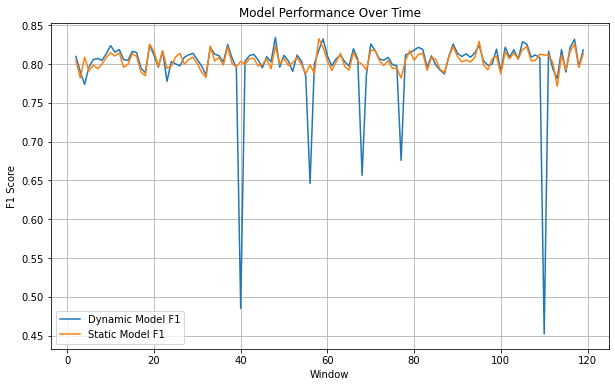

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

list_of_f1_Dynamic_model = []
list_of_f1_static_model = []

# Initialize a DataFrame to store performance metrics
performance_df = pd.DataFrame(columns=["Window", "Dynamic F1", "Static F1"])

for itr in range(1,120):
        data = get_records(1000)
        data = Read_data(data)
        data = data_preprocessing(data)
        data = Feature_select(data)
        pip = pipe_line(data)
        #print(data.head())
        X = data.drop(labels=["Target Attack"], axis=1)
        y = data["Target Attack"]
        Dy_pred = Dynamic_model.predict(X)
        D_f1 = accuracy_score(y, Dy_pred)
        print(f"The F1 Score of Dynamic Model without retrain = {D_f1 * 100}%")
        if (itr>1):
                        
                # Decision to retrain the dynamic model
                if D_f1 < 0.85:
                        print("Retraining model on new data")
                        Dynamic_model = pipe_line(training_data)
                        Dy_pred = Dynamic_model.predict(X)
                        D_f1 = accuracy_score(y, Dy_pred)
                        print(f"The F1 of Dynamic Model after retrain = {D_f1 * 100}%")

                Sy_pred = static_model.predict(X)
                S_f1 = accuracy_score(y, Sy_pred)
                print(f"The F1 of Static Model = {S_f1 * 100}%")

                list_of_f1_Dynamic_model.append(D_f1)
                list_of_f1_static_model.append(S_f1)

                # Append performance metrics to the DataFrame
                performance_df = performance_df.append({"Window": itr, "Dynamic F1": D_f1, "Static F1": S_f1}, ignore_index=True)
                print(f"{'*' * 10}")
        training_data = data


 

# Basic data visualization (you can create more detailed plots as needed)
plt.figure(figsize=(10, 6))
plt.plot(performance_df["Window"], performance_df["Dynamic F1"], label="Dynamic Model F1")
plt.plot(performance_df["Window"], performance_df["Static F1"], label="Static Model F1")
plt.xlabel("Window")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Model Performance Over Time")
plt.grid(True)
plt.show()
